# The Titanic Challenge

Just trying things here before going to the website notebook
Load the data first

In [274]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [338]:
train = pd.read_csv("../data/titanic/train.csv")
test = pd.read_csv("../data/titanic/train.csv")

In [339]:
train2 = train.copy()
test2 = test.copy()

In [347]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From [this](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8) tutorial

A lot of features need to be converted to numeric <br>
Some features such as age have missing data <br>
Features have wide ranges that we need to convert to roughly same scale <br>

In [277]:
train.isnull().sum().sort_values(ascending=False) #lots of missing fata in cabin and age features


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [278]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## SO what feature will contribute to high survival rate? Based on the data PassengerID, Name and Ticket have no effect on the chance of survival. But lets look at other features.

### a. Age and Sex

In [279]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/Users/mikemwanga/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

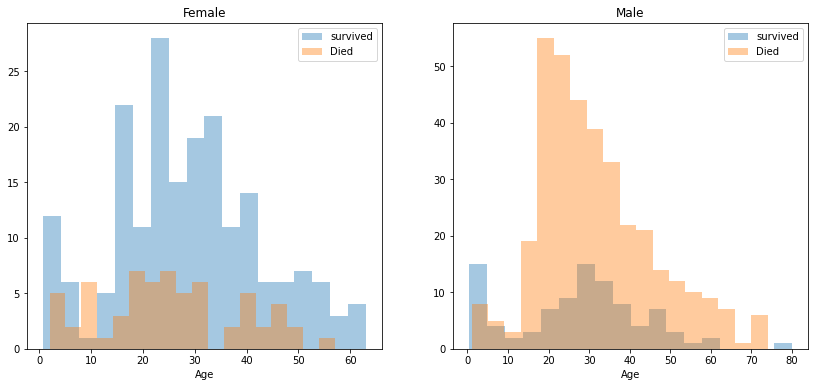

In [280]:
women = train[train["Sex"] == "female"]
men = train[train["Sex"] == "male"]
fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=18, label = 'Died', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[1], kde =False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=18, label = 'Died', ax = axes[1], kde =False)
ax.legend()
ax.set_title("Male")

More women survived than men. <br>
Infants have a little bit higher probability of survival than older people <br>

## Embarked in relation to sex, Pclass

/Users/mikemwanga/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


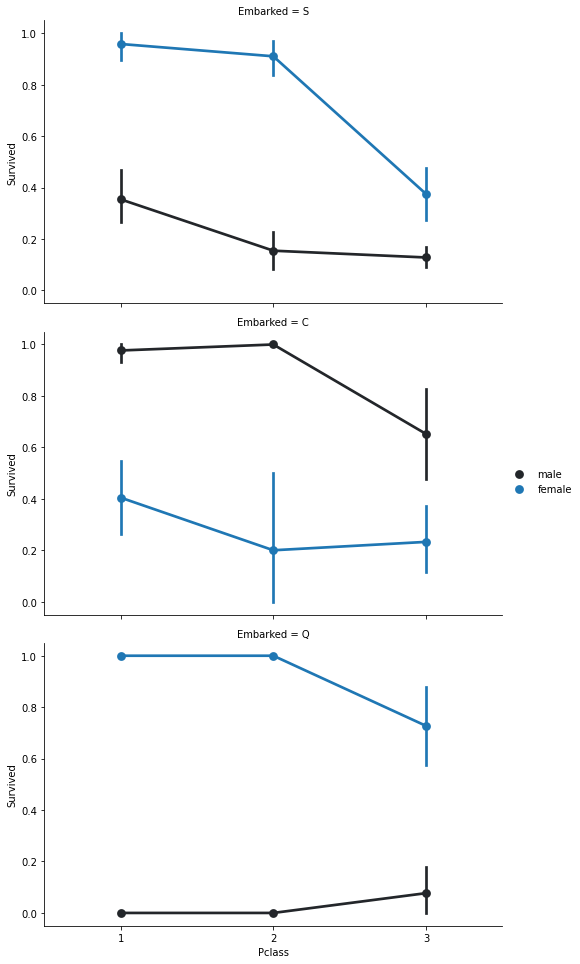

In [281]:
FacetGrid = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Embarked seems to be correlated with survival depending on gender. Women on port Q and S have higher chances of survival than men.

In [282]:
train_data = train
def bar_chart(feature):
    survived = train_data[train_data["Survived"] == 1][feature].value_counts()
    dead = train[train["Survived"] == 0][feature].value_counts()
    df_new = pd.DataFrame([survived, dead])
    df_new.index = ["Survived","Dead"] #create column name
    df_new.plot(kind="bar", stacked=True, figsize = (10,5))


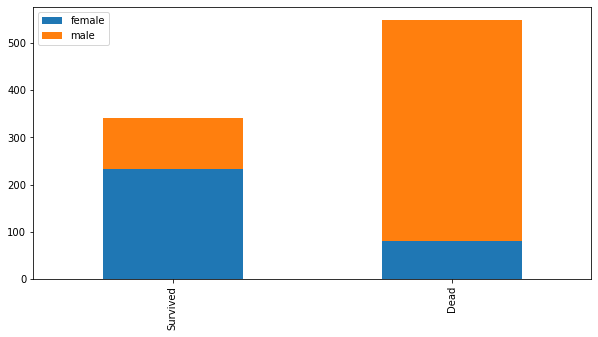

In [283]:
bar_chart("Sex")

More female survived than men.

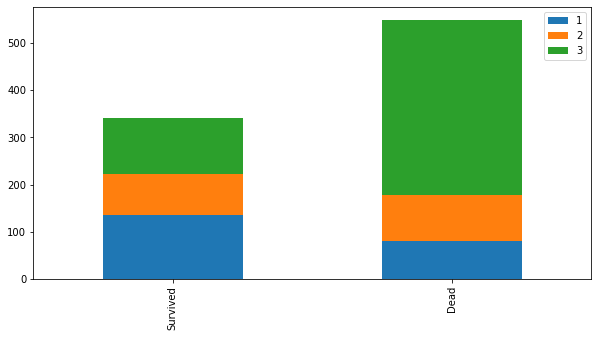

In [284]:
bar_chart("Pclass")

More people in third class died than second and first class.

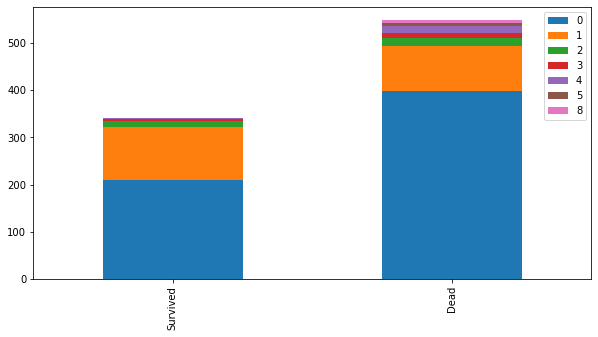

In [285]:
bar_chart('SibSp')

Passengers with no siblings more likely to die

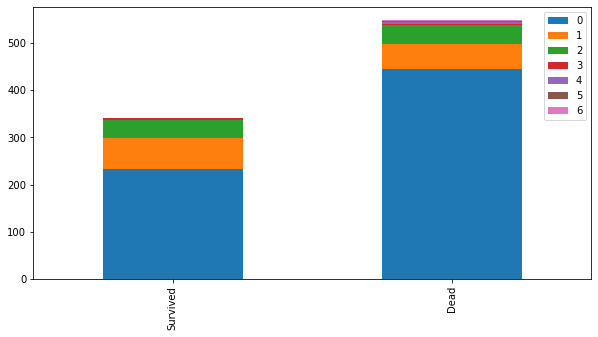

In [286]:
bar_chart('Parch')

Passengers without siblings died more than the others

In [287]:
train_data = train
train_data.loc[train_data['Age'] <= 16, 'Age'] = 0
train_data.loc[(train_data['Age'] > 16) & (train_data['Age'] <=26), 'Age'] = 1
train_data.loc[(train_data['Age'] > 26) & (train_data['Age'] <=36), 'Age'] = 2
train_data.loc[(train_data['Age'] > 36) & (train_data['Age'] <=62), 'Age'] = 3
train_data.loc[train_data['Age'] > 62, 'Age'] = 4

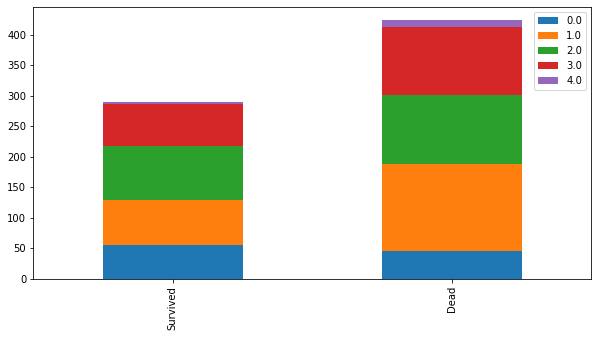

In [288]:
bar_chart("Age")

Younger passengers were more likely to survive than older ones.

PassengerId does not contribute anything to the dataset. So lets drop it.

In [289]:

train = pd.read_csv("../data/titanic/train.csv")
train_df = train.drop(["PassengerId", 'Cabin'], axis=1)


## Missing Data
Since Cabin has alot of missing data, we can go ahead and drop this feature. <br>

With regards to age, lets create a random array of numbers based on mean age and standard deviation based on missing ages

In [290]:
data = [train_df, test]

for dataset in data:
    mean = train_df["Age"].mean()
    std = train_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean-std, mean+std, size=is_null) #generate random ages for the missing values
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset['Age'] =train_df["Age"].astype(int)

train_df["Age"].isnull().sum()

0

Lets make age dataset machine readable <br>

Since embarked has only two missing values lets replace with the most common of all ("S")

In [291]:
for dataset in data:
    dataset.loc[dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <=18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <=22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <=27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <=33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <=40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <=66), 'Age'] = 6
    dataset.loc[dataset['Age'] > 66, 'Age'] = 7
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5

    

In [337]:
train["Embarked"].mode()

0    S
dtype: object

In [292]:
for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].fillna("S")

In [293]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,0.0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,PC 17599,3.0,C
2,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,1.0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,113803,3.0,S
4,0,3,"Allen, Mr. William Henry",male,5,0,0,373450,1.0,S


Fare is a float lets convert it to an interger. <br>
Also use the Name feature to create a title feature <br>
Convert Sex, Fare and Embarked feature into numeric <br>


In [294]:
for dataset in data:
    dataset["Fare"] = dataset['Fare'].fillna(0)
    dataset["Fare"] = dataset['Fare'].astype(int)

In [295]:
genders = {"male" : 1, "female":2}

for dataset in data:
    dataset["Sex"] = dataset["Sex"].map(genders)

In [296]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
ports = {"S":0,"C":1, "Q":2}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset["Embarked"] = dataset['Embarked'].map(ports)
train_df = train_df.drop(['Name','Ticket'], axis=1)
test = test.drop(['Name','Cabin','PassengerId','Ticket'], axis=1)

## Building ML Models

In [297]:
X = train_df.drop("Survived", axis=1)
Y = train_df["Survived"]

In [298]:
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7) #split the dataset into 80:20 ration


## 1. Logistic Regression (lg)

In [299]:
lg_model = LogisticRegression()
lg_model.fit(X_train, Y_train)
Y_predict = lg_model.predict(X_test)
lg_model_accuracy = round(accuracy_score(Y_test, Y_predict)*100,4)
lg_model_accuracy

75.9777

## 2. Stochastic Gradient Descent (SGD)

In [300]:
sgd_model = linear_model.SGDClassifier(max_iter=5,tol=None)
sgd_model.fit(X_train, Y_train)
Y_predict = sgd_model.predict(X_test)
sgd_model_accuracy = round(accuracy_score(Y_test, Y_predict) * 100,4)
sgd_model_accuracy

69.2737

## 3. Support Vector Model (SVM)

In [301]:
svm_model = SVC()
svm_model.fit(X_train, Y_train)
Y_predict = svm_model.predict(X_test)
svm_model_accuracy = round(accuracy_score(Y_test, Y_predict)*100,4)
svm_model_accuracy

76.5363

## 4. K-Nearest Neighbour (KNN)

In [302]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
Y_predict = knn_model.predict(X_test)
knn_accuracy  = round(accuracy_score(Y_test, Y_predict) *100,4)
knn_accuracy

78.2123

## 5. Gausina Naive Bayes (GNB)

In [303]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, Y_train)
Y_predict = gnb_model.predict(X_test)
gnb_model_accuracy = round(accuracy_score(Y_test, Y_predict) *100,4)
gnb_model_accuracy

77.095

## 6. Decision Tree Model

In [304]:
dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, Y_train)
Y_predict = dt_model.predict(X_test)
dt_model_accuracy  = round(accuracy_score(Y_test, Y_predict) * 100,4)
dt_model_accuracy

77.6536

## 7. Random Forest

In [305]:
rmf_model = RandomForestClassifier()
rmf_model.fit(X_train, Y_train)
Y_predict = rmf_model.predict(X_test)
rmf_model_accuracy = round(accuracy_score(Y_test,Y_predict) *100, 4)
rmf_model_accuracy


79.8883

## 8. Perceptron

In [306]:
ppn_model = Perceptron()
ppn_model.fit(X_train, Y_train)
Y_predict = ppn_model.predict(X_test)
ppn_model_accuracy = round(accuracy_score(Y_test, Y_predict) * 100, 4)
ppn_model_accuracy

64.2458

Which model best fits the dataset?

In [310]:
results = pd.DataFrame(
    {'Model' :["Logistic Regression", "Stochastic Gradient Model", "Support Vector", "KNN", "GaussianNB", "Decision Tree", "Random Forest", "Perceptron"], 
    'Score':[lg_model_accuracy,sgd_model_accuracy,svm_model_accuracy, knn_accuracy, gnb_model_accuracy, dt_model_accuracy, rmf_model_accuracy,ppn_model_accuracy]}
)

results_df = results.sort_values(by="Score", ascending=False)

#Graphical display 

import plotly.express as pltx

fig = pltx.bar(results_df,
               y="Model", x="Score",
               title = "Model accuracy",
               width = 800,height=400)
fig.show()

## Model Cross validation (K-Fold Cross Validation)
Approach splits the data into K-subsets
The best model gets to be trained and evaluated k-times with training on k-1 datasets and evaluated on the raming subset.


In [333]:
#random forest was the best model for this dataset
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring="accuracy")

print("Scores:", scores)
print("Mean: %.2f" % scores.mean())
print("Standard deviation: %.2f" % scores.std())

Scores: [0.81944444 0.75       0.85915493 0.85915493 0.90140845 0.77464789
 0.92957746 0.85915493 0.8028169  0.78873239]
Mean: 0.83
Standard deviation: 0.05


Model has average accuracy of 83% and standard deviation of 5%